In [7]:
!pip install missingno shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -------- ------------------------------- 92.2/456.2 kB 1.8 MB/s eta 0:00:01
   -------------------------------- ------- 368.6/456.2 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 3.6 MB/s eta 0:00:00


In [8]:
### 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # For missing values visualization
import shap  # For explainability
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Load the HDI dataset (CSV file)
hdi_df = pd.read_csv(r"C:\Users\sonal\Portfolio_Projects/dataset/HDI.csv")
#display(hdi_df.head())  # Show first few rows

# Load the World Bank dataset (Excel file)
worldbank_df = pd.read_excel(r"C:\Users\sonal\Portfolio_Projects/dataset/WorldBank.xlsx")
#display(worldbank_df.head())

# Load the Data Dictionary (CSV file)
data_dict = pd.read_csv(r"C:\Users\sonal\Portfolio_Projects/dataset/world_indicators_data_dictionary.csv", encoding="ISO-8859-1")
display(data_dict.head())

,Table,Field,Description
0,WorldBank,Country Name,The name of the country
1,WorldBank,Country Code,The three letter code representing the country
2,WorldBank,Region,The World Bank region of the country
3,WorldBank,IncomeGroup,The World Bank Income Group of the country
4,WorldBank,Year,The Year in which the statistics were recorded


iso3              0
country           0
hdicode          15
region           55
hdi_rank_2021    15
                 ..
mf_2017          38
mf_2018          38
mf_2019          38
mf_2020          38
mf_2021          38
Length: 1008, dtype: int64


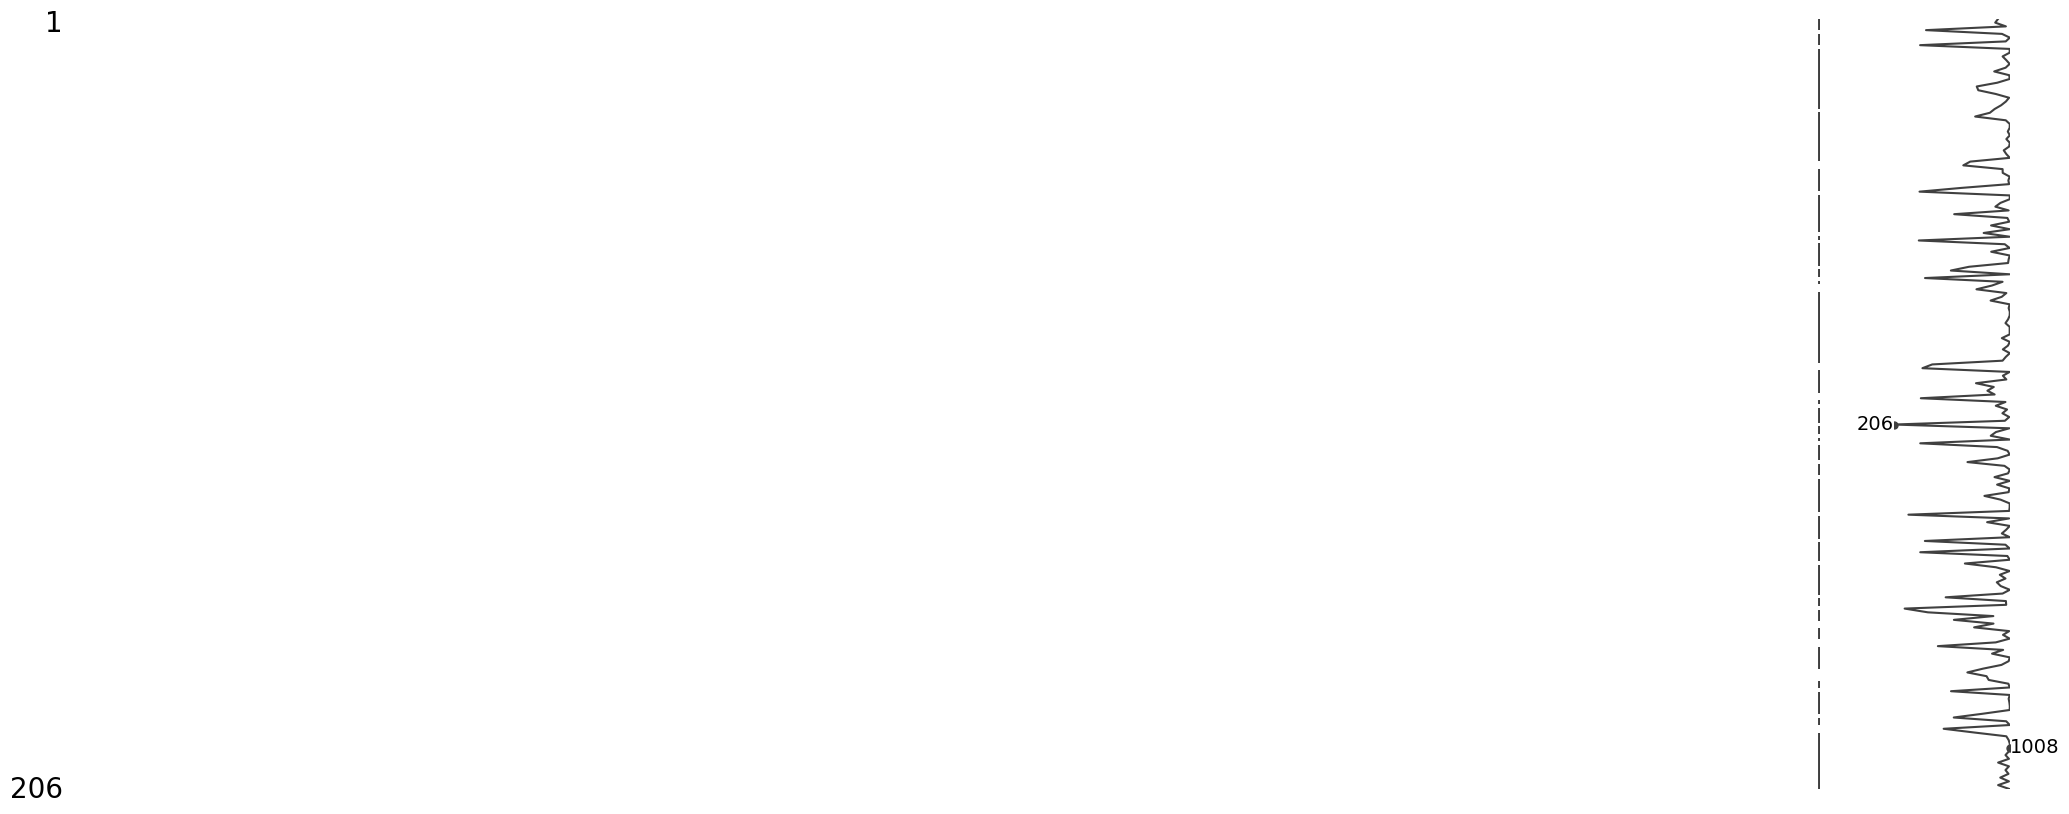

In [32]:
### 3. Explore the Data (EDA)
# Check for missing values
print(hdi_df.isnull().sum())
msno.matrix(hdi_df)  # Visualize missing values
plt.show()

# print(worldbank_df.isnull().sum())
# msno.matrix(worldbank_df)  # Visualize missing values
# plt.show()

In [26]:
display(hdi_df.describe())

,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
count,191.000000,152.000000,152.000000,152.000000,152.000000,152.000000,163.000000,163.000000,163.000000,163.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,95.811518,0.595112,0.597862,0.600493,0.604474,0.609329,0.613908,0.619663,0.624975,0.630417,...,15.249784,15.385926,15.347629,15.352632,15.342119,15.491780,14.597416,14.776332,14.775408,14.774396
std,55.307333,0.161918,0.161921,0.162193,0.163122,0.163818,0.162789,0.163461,0.164299,0.165177,...,14.134572,14.555342,14.363092,14.680340,15.015809,15.333709,13.581871,14.266308,14.266504,14.266706
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.430000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,48.500000,0.477750,0.477000,0.475250,0.474250,0.476500,0.480500,0.488500,0.490000,0.492000,...,4.597500,4.525000,4.452375,4.457500,4.517500,4.575000,4.612500,4.732500,4.732500,4.732500
50%,96.000000,0.621500,0.623500,0.622000,0.624000,0.623500,0.642000,0.650000,0.651000,0.657000,...,10.907725,11.272314,10.745000,10.260000,10.590000,10.895000,11.215000,11.030000,11.030000,11.030000
75%,143.500000,0.725500,0.727000,0.723750,0.724250,0.733750,0.737000,0.743000,0.752500,0.759000,...,20.345000,20.397500,20.227500,20.187500,19.350000,19.757500,18.432500,17.932500,17.932500,17.932500
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.560000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


In [27]:
display(worldbank_df.describe())

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000


In [28]:
display(data_dict.describe())

,Table,Field,Description
count,58,58,58
unique,2,58,55
top,hdi,Country Name,The name of the country
freq,43,1,2


In [33]:
import os
print(os.getcwd())  # This will print your current working directory

C:\Users\sonal\Portfolio_Projects
